# Missing values

When working with datasets, it’s common to encounter missing values, so knowing how to identify and manage them is important.

###  What missing values mean

Real-world data is rarely complete — some pieces of information may be absent for various reasons.

### Representing missing values in pandas

In pandas, missing entries are represented as `NaN`, which stands for “Not a Number.”

### Detecting missing data

The `.isna()` method can be used to check for missing values, returning a Boolean indicator for each entry.

### Checking for missing values by column

By combining `.isna()` with `.any()`, you can quickly see if any variable contains missing values.

### Counting missing values

Since Booleans can be summed, `.isna().sum()` provides the total number of missing entries in each column.

### Visualizing missing data

Bar plots can be used to show how many missing values exist per column, making it easier to identify problem areas in larger datasets.

### Removing missing values

One approach is to delete rows containing missing data with `.dropna()`. This is simple, but it can reduce the dataset significantly if many values are missing.

### Replacing missing values

Alternatively, missing data can be replaced using `.fillna()`, where you specify a substitute value. More advanced imputation techniques can also be applied depending on the situation.


## Preparing Data

In [15]:
import pandas as pd
avocados_2016 = pd.read_csv("datasets/avocados_2016.csv")
avocados_2016.head()

,date,avg_price,total_sold,small_sold,large_sold,xl_sold,total_bags_sold,small_bags_sold,large_bags_sold,xl_bags_sold
0,2016-12-25,1.00,30287853.70,9255125.20,10282925.61,541972.42,10207830.47,7709584.33,2417144.92,81101.22
1,2016-12-18,0.96,29583882.61,9394065.91,10339168.20,427872.42,9422776.08,6970320.34,2358443.96,94011.78
2,2016-12-11,0.98,30093540.70,9009996.11,NaN,403047.93,10713276.64,8149438.75,2490495.07,73342.82
3,2016-12-04,1.00,31621221.90,11043350.90,9908982.97,428009.84,10240878.19,7187022.58,2988504.98,65350.63
4,2016-11-27,1.21,22923062.65,7891487.94,7337341.77,NaN,7349757.04,5691266.56,1609867.20,48623.28


## Exercise: Finding missing values

Missing entries are common in datasets, and they can cause problems in your analysis. While some functions automatically skip over them, others might fail completely if missing values are present. That’s why it’s important to detect and handle them before moving forward. In this task, you’ll explore whether the dataset contains any missing values and how many.

You have:

* `pandas` already imported as `pd`
* `avocados_2016`, a DataFrame with avocado sales from 2016

### Instructions

1. Display a DataFrame showing `True` or `False` for whether each cell in `avocados_2016` is missing.
2. Print a quick check that tells if each column contains any missing values.
3. Make a bar chart showing how many missing values exist in each column.


In [16]:
# Import plotting library
import matplotlib.pyplot as plt

# 1. Identify missing values in each cell
print(avocados_2016.isnull())

     date  avg_price  total_sold  small_sold  large_sold  xl_sold  \
0   False      False       False       False       False    False   
1   False      False       False       False       False    False   
2   False      False       False       False        True    False   
3   False      False       False       False       False    False   
4   False      False       False       False       False     True   
5   False      False       False        True       False    False   
6   False      False       False       False       False    False   
7   False      False       False       False        True    False   
8   False      False       False       False       False    False   
9   False      False       False       False       False    False   
10  False      False       False       False        True    False   
11  False      False       False       False       False    False   
12  False      False       False       False       False    False   
13  False      False       False  

In [17]:
# 2. Check if any missing values exist per column
print(avocados_2016.isnull().any())

date               False
avg_price          False
total_sold         False
small_sold          True
large_sold          True
xl_sold             True
total_bags_sold    False
small_bags_sold    False
large_bags_sold    False
xl_bags_sold       False
dtype: bool


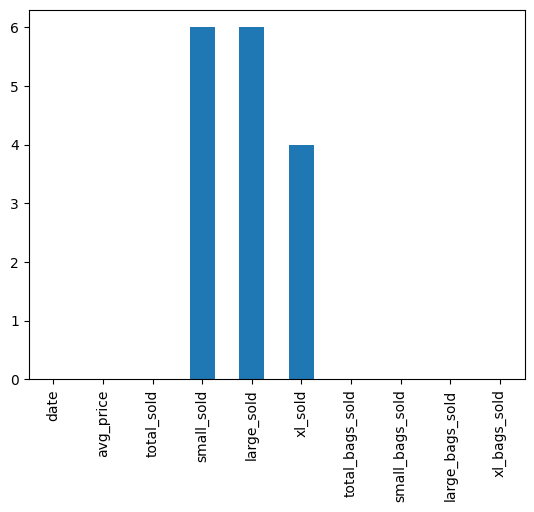

In [18]:
# 3. Visualize number of missing values by column
missing_counts = avocados_2016.isnull().sum()
missing_counts.plot.bar()

# 4. Display the plot
plt.show()

## Exercise: Removing missing values

Once you've identified missing values in your dataset, one straightforward approach is to eliminate them entirely. This ensures that your analysis is based only on complete data. In this task, you’ll remove any rows that contain missing values from the `avocados_2016` DataFrame.

### Instructions

1. Eliminate all rows in `avocados_2016` that contain at least one missing value and save the cleaned DataFrame as `avocados_complete`.
2. Confirm that no missing values remain in `avocados_complete` by checking each column.

In [19]:
# Remove any rows that include missing values
avocados_complete = avocados_2016.dropna()

# Confirm that there are no missing values left
print(avocados_complete.isna().any())

date               False
avg_price          False
total_sold         False
small_sold         False
large_sold         False
xl_sold            False
total_bags_sold    False
small_bags_sold    False
large_bags_sold    False
xl_bags_sold       False
dtype: bool


## Exercise: Replacing missing values

Instead of dropping rows with missing data, another strategy is to **replace** them with a value. For numeric data, a common choice is `0`. In this case, you’ll assume that if the number of avocados sold is missing, it means **no sales happened** for that size.

You’ll explore how replacing missing values changes the distribution of sales by plotting histograms before and after the replacement.

### Instructions

**Step 1**

* A list named `cols_with_missing` has been created, containing `"small_sold"`, `"large_sold"`, and `"xl_sold"`.
* Create histograms for these columns to see the distribution with missing values.
* Display the plot.

**Step 2**

* Replace missing values in the DataFrame with `0` and save the result as `avocados_filled`.
* Plot histograms for the same columns in `avocados_filled` and compare the distributions.

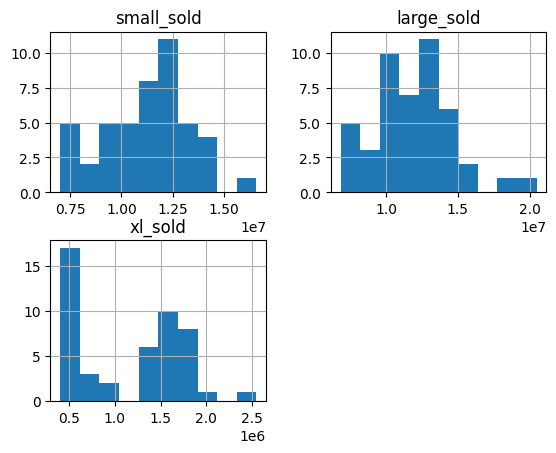

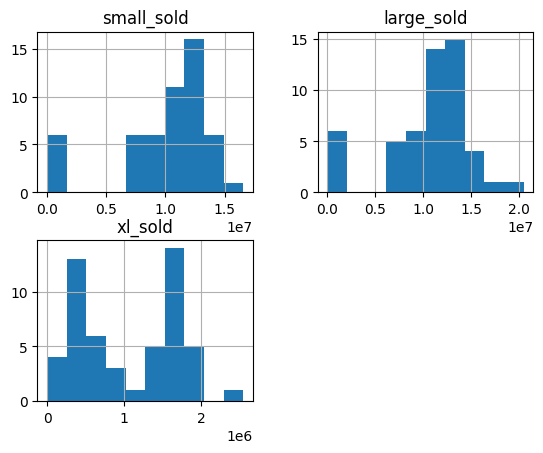

In [20]:
# Step 1: Columns with missing values
cols_with_missing = ["small_sold", "large_sold", "xl_sold"]

# Plot histograms of the original columns (with NaNs)
avocados_2016[cols_with_missing].hist()
plt.show()

# Step 2: Replace missing values with 0
avocados_filled = avocados_2016.fillna(0)

# Plot histograms of the columns after filling NaNs
avocados_filled[cols_with_missing].hist()
plt.show()